In [1]:
import numpy as np
import pandas as pd

import glob, os
from glob import glob

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from IPython.display import display

import dlib
import cv2

### Getting the participant codes

In [2]:
directories = glob("FACS/*/")
participants = [x.split('/')[1] for x in directories]

print("There are %s video sequences."%str(len(participants)))

participants


There are 52 video sequences.


['aa048t2aeaff',
 'ak064t1aaaff',
 'ak064t1aiaff',
 'bg096t1aaaff',
 'bg096t1aeaff',
 'bg096t1afaff',
 'bg096t2aaaff',
 'bg096t2afaff',
 'bm049t1aaaff',
 'bm049t2aaaff',
 'bn080t1aaaff',
 'bn080t1aaunaff',
 'bn080t1aeaff',
 'bn080t1aeunaff',
 'bn080t1afaff',
 'ch092t1aiaff',
 'ch092t2aaaff',
 'ch092t2aiaff',
 'dn124t1aaaff',
 'dn124t1aeaff',
 'dn124t1afaff',
 'dr052t1aeaff',
 'dr052t1aiaff',
 'dr052t2aiaff',
 'fn059t2aiaff',
 'gf097t1aaaff',
 'hs107t1afaff',
 'hs107t2aaaff',
 'ib109t1aeaff',
 'jh043t1aeaff',
 'jh043t2aeaff',
 'jh123t1aeaff',
 'jk103t1aaaff',
 'jl047t1aaaff',
 'jl047t1aiaff',
 'jy115t1aaaff',
 'jy115t2aaaff',
 'kz120t1aaaff',
 'll042t1aaaff',
 'll042t1afaff',
 'll042t1aiaff',
 'mg066t1aaaff',
 'mg066t1aeaff',
 'mg066t1afaff',
 'mg066t2afaff',
 'nm106t1aaaff',
 'th108t1aeaff',
 'th108t1afaff',
 'th108t2afaff',
 'tv095t1afaff',
 'tv095t2afaff',
 'vw121t1aaaff']

### Getting the images for a participant

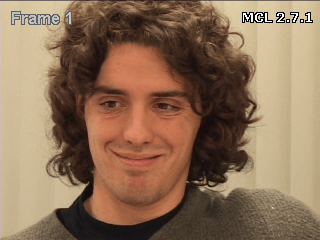

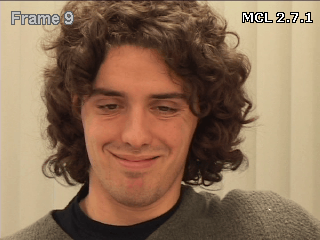

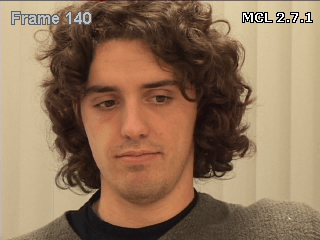

In [3]:
### Let us look at a couple of frames
ima_num = ['001','009','140']
x = Image.open('Images/'+participants[0]+'/'+participants[0]+ima_num[0]+'.png', 'r')
y = Image.open('Images/'+participants[0]+'/'+participants[0]+ima_num[1]+'.png', 'r')
z = Image.open('Images/'+participants[0]+'/'+participants[0]+ima_num[2]+'.png', 'r')
    
display(x,y,z)
    

In [4]:
### Let us get a view of type and shape (pixels) of files too
img_raw = cv2.imread('Images/'+participants[0]+'/'+participants[0]+ima_num[0]+'.png')
print(type(img_raw))
img_raw.shape

<class 'numpy.ndarray'>


(240, 320, 3)

In [5]:
### A helper function for dlib library

def detect_face(im):

    face_detector = dlib.get_frontal_face_detector()

    detected_faces = face_detector(im, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

In [6]:
### Let us detect and crop the faces using dlib
cropped_faces = np.zeros((1,60,60))
for i in range(len(participants)):
    
    print(participants[i] + ' being cropped and numpyfied.')

    os.chdir('my_directory/pain_recognition_training/Images/'+participants[i])
    for file in glob("*.png"):
        file_number = file[-7:-4]
        detect_image = cv2.imread(file)
        image_gray = cv2.cvtColor(detect_image, cv2.COLOR_BGR2GRAY)
        
        detected_faces = detect_face(image_gray)
        
        try:
            face = Image.fromarray(image_gray).crop(detected_faces[0])
        except:
            face = Image.fromarray(image_gray)
        face = face.resize((60,60))
        numpy_object = np.array(face)
        numpy_object = numpy_object.reshape((1,60,60))
        cropped_faces = np.append(cropped_faces,numpy_object,axis=0)
            
    cropped_faces.shape
        
    

aa048t2aeaff being cropped and numpyfied.
ak064t1aaaff being cropped and numpyfied.
ak064t1aiaff being cropped and numpyfied.
bg096t1aaaff being cropped and numpyfied.
bg096t1aeaff being cropped and numpyfied.
bg096t1afaff being cropped and numpyfied.
bg096t2aaaff being cropped and numpyfied.
bg096t2afaff being cropped and numpyfied.
bm049t1aaaff being cropped and numpyfied.
bm049t2aaaff being cropped and numpyfied.
bn080t1aaaff being cropped and numpyfied.
bn080t1aaunaff being cropped and numpyfied.
bn080t1aeaff being cropped and numpyfied.
bn080t1aeunaff being cropped and numpyfied.
bn080t1afaff being cropped and numpyfied.
ch092t1aiaff being cropped and numpyfied.
ch092t2aaaff being cropped and numpyfied.
ch092t2aiaff being cropped and numpyfied.
dn124t1aaaff being cropped and numpyfied.
dn124t1aeaff being cropped and numpyfied.
dn124t1afaff being cropped and numpyfied.
dr052t1aeaff being cropped and numpyfied.
dr052t1aiaff being cropped and numpyfied.
dr052t2aiaff being cropped and

In [7]:
cropped_faces = cropped_faces[1:]
cropped_faces.shape

(17270, 60, 60)

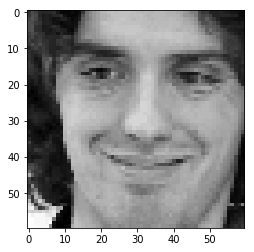

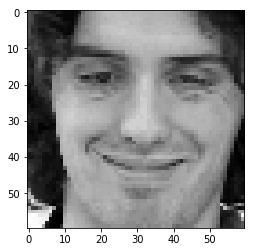

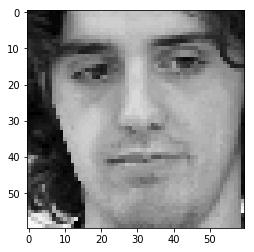

In [8]:
### Let us see what a cropped face looks like (SAME as those above):
plt.figure()
plt.imshow(cropped_faces[0,:,:], cmap='gray')
plt.figure()
plt.imshow(cropped_faces[8,:,:], cmap='gray')
plt.figure()
plt.imshow(cropped_faces[139,:,:], cmap='gray')


In [9]:
###We will save this numpy array of image input. Loading will be performed by np.load('name.npy')
np.save('my_directory/pain_recognition_training/face_images.npy', cropped_faces)

### Getting the labels for a participant

In [10]:
label1 = pd.read_csv('my_directory/pain_recognition_training/FACS/aa048t2aeaff/aa048t2aeaff017_facs.txt',
                     sep=" ", header=None)

label1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.0
1,NaN,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.0
2,NaN,NaN,NaN,12.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,0.0
3,NaN,NaN,NaN,20.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,0.0


In [11]:
labels = pd.DataFrame()
for i in range(len(participants)):
    print(participants[i])
    os.chdir('my_directory/pain_recognition_training/FACS/'+participants[i])
    for file in glob("*.txt"):
        try:
            label1 = pd.read_csv(file, sep=" ", header=None)
        except:
            label1 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0]])
            label1 = pd.DataFrame(label1)
            
        label1['number_id'] = file[:-9]
        labels = pd.concat([labels,label1])
        
labels = labels[[3,6,'number_id']]
labels.rename(columns={3:'AU_number',6:'intensity'},inplace=True)
print(labels.shape)
labels

aa048t2aeaff
ak064t1aaaff
ak064t1aiaff
bg096t1aaaff
bg096t1aeaff
bg096t1afaff
bg096t2aaaff
bg096t2afaff
bm049t1aaaff
bm049t2aaaff
bn080t1aaaff
bn080t1aaunaff
bn080t1aeaff
bn080t1aeunaff
bn080t1afaff
ch092t1aiaff
ch092t2aaaff
ch092t2aiaff
dn124t1aaaff
dn124t1aeaff
dn124t1afaff
dr052t1aeaff
dr052t1aiaff
dr052t2aiaff
fn059t2aiaff
gf097t1aaaff
hs107t1afaff
hs107t2aaaff
ib109t1aeaff
jh043t1aeaff
jh043t2aeaff
jh123t1aeaff
jk103t1aaaff
jl047t1aaaff
jl047t1aiaff
jy115t1aaaff
jy115t2aaaff
kz120t1aaaff
ll042t1aaaff
ll042t1afaff
ll042t1aiaff
mg066t1aaaff
mg066t1aeaff
mg066t1afaff
mg066t2afaff
nm106t1aaaff
th108t1aeaff
th108t1afaff
th108t2afaff
tv095t1afaff
tv095t2afaff
vw121t1aaaff
(27362, 3)


,AU_number,intensity,number_id
0,0.0,0.0,aa048t2aeaff001
0,0.0,0.0,aa048t2aeaff002
0,0.0,0.0,aa048t2aeaff003
0,0.0,0.0,aa048t2aeaff004
0,0.0,0.0,aa048t2aeaff005
0,0.0,0.0,aa048t2aeaff006
0,0.0,0.0,aa048t2aeaff007
0,0.0,0.0,aa048t2aeaff008
0,0.0,0.0,aa048t2aeaff009
0,0.0,0.0,aa048t2aeaff010


In [12]:
labels['AU_intensity_class'] = 'AU' + labels['AU_number'].astype(str) + '_' + labels['intensity'].astype(str)

In [13]:
label_df = []

for num_id in labels['number_id'].unique():
    line = []
    line.append(num_id)
    
    helper = list(labels[labels['number_id']==num_id]['AU_intensity_class'])
    string1 = ', '.join(helper)
    line.append(string1)
    
    label_df.append(line)
    
label_df = pd.DataFrame(label_df,columns=['id','labels_for_dummies'])
label_df.shape

(17270, 2)

### Now we create dummy variables for the multi-labeling problem

In [14]:
label_df = pd.concat([label_df,pd.Series(label_df['labels_for_dummies']).str.get_dummies(', ')],axis=1)
label_df

,id,labels_for_dummies,AU0.0_0.0,AU10.0_1.0,AU10.0_2.0,AU10.0_3.0,AU10.0_4.0,AU10.0_5.0,AU12.0_1.0,AU12.0_2.0,...,AU7.0_1.0,AU7.0_2.0,AU7.0_3.0,AU7.0_4.0,AU7.0_5.0,AU9.0_1.0,AU9.0_2.0,AU9.0_3.0,AU9.0_4.0,AU9.0_5.0
0,aa048t2aeaff001,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,aa048t2aeaff002,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aa048t2aeaff003,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,aa048t2aeaff004,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,aa048t2aeaff005,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,aa048t2aeaff006,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,aa048t2aeaff007,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,aa048t2aeaff008,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,aa048t2aeaff009,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,aa048t2aeaff010,AU0.0_0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
label_df.to_csv('my_directory/pain_recognition_training/frame_labels.csv',index=False)